In [20]:
import os
import pandas as pd
import seaborn as sns
import env
# import acquire
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime

In [72]:
column_list = ['FL_DATE', 'OP_CARRIER', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
flights2009 = pd.read_csv('airline delay analysis/2009.csv', usecols=column_list)

In [73]:
flights2009 = flights2009[flights2009['OP_CARRIER'] == 'UA']

In [74]:
print(flights2009.size)
flights2009.isna().sum()

2633904


FL_DATE                     0
OP_CARRIER                  0
CARRIER_DELAY          313510
WEATHER_DELAY          313510
NAS_DELAY              313510
SECURITY_DELAY         313510
LATE_AIRCRAFT_DELAY    313510
dtype: int64

In [75]:
flights2009

,FL_DATE,OP_CARRIER,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
3102,2009-01-01,UA,NaN,NaN,NaN,NaN,NaN
3103,2009-01-01,UA,NaN,NaN,NaN,NaN,NaN
3104,2009-01-01,UA,NaN,NaN,NaN,NaN,NaN
3105,2009-01-01,UA,NaN,NaN,NaN,NaN,NaN
3106,2009-01-01,UA,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6421229,2009-12-31,UA,42.0,0.0,9.0,0.0,0.0
6421230,2009-12-31,UA,NaN,NaN,NaN,NaN,NaN
6421231,2009-12-31,UA,63.0,0.0,14.0,0.0,0.0
6421232,2009-12-31,UA,NaN,NaN,NaN,NaN,NaN


In [76]:
flights2010 = pd.read_csv('airline delay analysis/2010.csv', usecols=column_list)

In [77]:
flights2010 = flights2010[flights2010['OP_CARRIER'] == 'UA']

In [78]:
flights2010

,FL_DATE,OP_CARRIER,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
1826,2010-01-01,UA,26.0,0.0,15.0,0.0,0.0
1827,2010-01-01,UA,NaN,NaN,NaN,NaN,NaN
1828,2010-01-01,UA,NaN,NaN,NaN,NaN,NaN
1829,2010-01-01,UA,NaN,NaN,NaN,NaN,NaN
1830,2010-01-01,UA,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6449043,2010-12-31,UA,NaN,NaN,NaN,NaN,NaN
6449044,2010-12-31,UA,NaN,NaN,NaN,NaN,NaN
6449045,2010-12-31,UA,NaN,NaN,NaN,NaN,NaN
6449046,2010-12-31,UA,0.0,0.0,34.0,0.0,0.0


In [79]:
flights2009.append(flights2010)

/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_2499/4259961005.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flights2009.append(flights2010)


,FL_DATE,OP_CARRIER,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
3102,2009-01-01,UA,NaN,NaN,NaN,NaN,NaN
3103,2009-01-01,UA,NaN,NaN,NaN,NaN,NaN
3104,2009-01-01,UA,NaN,NaN,NaN,NaN,NaN
3105,2009-01-01,UA,NaN,NaN,NaN,NaN,NaN
3106,2009-01-01,UA,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6449043,2010-12-31,UA,NaN,NaN,NaN,NaN,NaN
6449044,2010-12-31,UA,NaN,NaN,NaN,NaN,NaN
6449045,2010-12-31,UA,NaN,NaN,NaN,NaN,NaN
6449046,2010-12-31,UA,0.0,0.0,34.0,0.0,0.0


In [80]:
column_list = ['FL_DATE', 'OP_UNIQUE_CARRIER', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']    
flights2019 = pd.read_csv(f'airline delay analysis/2019.csv', usecols=column_list) 
flights2019 = flights2019.rename(columns={'OP_UNIQUE_CARRIER':'OP_CARRIER'})
flights2019 = flights2019[flights2019['OP_CARRIER'] == 'UA']

In [81]:
flights2019

,FL_DATE,OP_CARRIER,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
4695,2019-01-01,UA,0.0,0.0,34.0,0.0,0.0
4696,2019-01-01,UA,NaN,NaN,NaN,NaN,NaN
4697,2019-01-01,UA,NaN,NaN,NaN,NaN,NaN
4698,2019-01-01,UA,NaN,NaN,NaN,NaN,NaN
4699,2019-01-01,UA,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
7417301,2019-12-31,UA,NaN,NaN,NaN,NaN,NaN
7417302,2019-12-31,UA,NaN,NaN,NaN,NaN,NaN
7417303,2019-12-31,UA,NaN,NaN,NaN,NaN,NaN
7417304,2019-12-31,UA,NaN,NaN,NaN,NaN,NaN


### Function to pull different airline data

In [82]:
def pull_airline_data(airline = 'UA') -> pd.DataFrame:
    filename = f'{airline}.csv'
    
    #if this airline has already been pulled it will be saved as csv
    if os.path.isfile(filename):
        return pd.read_csv(filename, index_col=[0])
    
    #Pull and Create the df
    else:
        #Create the list of columns # want to pull from the dataframe
        column_list = ['FL_DATE', 'OP_CARRIER', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

        #Pull the abridged columns in a loop for 2009-2018 creating an empth df outside the loop
        flights = pd.DataFrame()
        for i in range(2009, 2019):
            # read each csv and pull the columns of interest
            flightsi = pd.read_csv(f'airline delay analysis/{i}.csv', usecols=column_list)
            # Mask for specific airline which in this case is United Airlines or UA
            flightsi = flightsi[flightsi['OP_CARRIER'] == airline]
            #links all the df's together vertically into one
            flights = flights.append(flightsi)

        #2019 dataset slightly different with less columns and OP_UNIQUE_CARRIER instead of OP_CARRIER
        column_list = ['FL_DATE', 'OP_UNIQUE_CARRIER', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']    
        #SAME as above except renames the column in order to append (MVP SOLUTION)
        flights2019 = pd.read_csv(f'airline delay analysis/2019.csv', usecols=column_list) 
        flights2019 = flights2019.rename(columns={'OP_UNIQUE_CARRIER':'OP_CARRIER'})
        flights2019 = flights2019[flights2019['OP_CARRIER'] == 'UA']
        flights = flights.append(flights2019)
        
        #create the csv
        flights.to_csv(f'{airline}.csv')
        
        #return the db
        return flights

In [83]:
flights = pull_airline_data('DL')

In [84]:
flights

,FL_DATE,OP_CARRIER,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
15209,2009-01-01,DL,6.0,0.0,0.0,0.0,52.0
15210,2009-01-01,DL,NaN,NaN,NaN,NaN,NaN
15211,2009-01-01,DL,0.0,0.0,0.0,0.0,92.0
15212,2009-01-01,DL,0.0,0.0,0.0,0.0,264.0
15213,2009-01-01,DL,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
7411212,2019-12-31,DL,NaN,NaN,NaN,NaN,NaN
7411213,2019-12-31,DL,NaN,NaN,NaN,NaN,NaN
7411214,2019-12-31,DL,NaN,NaN,NaN,NaN,NaN
7411215,2019-12-31,DL,NaN,NaN,NaN,NaN,NaN


### Fills in the na values as 0 because na means 0 delay for given cause

In [85]:
flights.fillna(0, inplace=True)

In [86]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8833866 entries, 15209 to 7411216
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   CARRIER_DELAY        float64
 3   WEATHER_DELAY        float64
 4   NAS_DELAY            float64
 5   SECURITY_DELAY       float64
 6   LATE_AIRCRAFT_DELAY  float64
dtypes: float64(5), object(2)
memory usage: 539.2+ MB


In [87]:
flights.FL_DATE = flights.FL_DATE.astype('datetime64')
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8833866 entries, 15209 to 7411216
Data columns (total 7 columns):
 #   Column               Dtype         
---  ------               -----         
 0   FL_DATE              datetime64[ns]
 1   OP_CARRIER           object        
 2   CARRIER_DELAY        float64       
 3   WEATHER_DELAY        float64       
 4   NAS_DELAY            float64       
 5   SECURITY_DELAY       float64       
 6   LATE_AIRCRAFT_DELAY  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 539.2+ MB


In [88]:
flights = flights.set_index('FL_DATE')

In [89]:
flights

,OP_CARRIER,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
FL_DATE,,,,,,
2009-01-01,DL,6.0,0.0,0.0,0.0,52.0
2009-01-01,DL,0.0,0.0,0.0,0.0,0.0
2009-01-01,DL,0.0,0.0,0.0,0.0,92.0
2009-01-01,DL,0.0,0.0,0.0,0.0,264.0
2009-01-01,DL,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2019-12-31,DL,0.0,0.0,0.0,0.0,0.0
2019-12-31,DL,0.0,0.0,0.0,0.0,0.0
2019-12-31,DL,0.0,0.0,0.0,0.0,0.0


In [90]:
flights['total_delays'] = flights.CARRIER_DELAY + flights.WEATHER_DELAY + flights.NAS_DELAY + flights.SECURITY_DELAY + flights.LATE_AIRCRAFT_DELAY

In [91]:
flights

,OP_CARRIER,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,total_delays
FL_DATE,,,,,,,
2009-01-01,DL,6.0,0.0,0.0,0.0,52.0,58.0
2009-01-01,DL,0.0,0.0,0.0,0.0,0.0,0.0
2009-01-01,DL,0.0,0.0,0.0,0.0,92.0,92.0
2009-01-01,DL,0.0,0.0,0.0,0.0,264.0,264.0
2009-01-01,DL,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2019-12-31,DL,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-31,DL,0.0,0.0,0.0,0.0,0.0,0.0
2019-12-31,DL,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
flights = flights.drop(columns=['OP_CARRIER', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'])

In [93]:
flights

,total_delays
FL_DATE,
2009-01-01,58.0
2009-01-01,0.0
2009-01-01,92.0
2009-01-01,264.0
2009-01-01,0.0
...,...
2019-12-31,0.0
2019-12-31,0.0
2019-12-31,0.0


In [94]:
flights.index.value_counts()

2011-06-17    4470
2011-06-10    4466
2011-06-24    4464
2011-06-13    4448
2011-06-09    4438
              ... 
2009-05-24     919
2009-12-25     908
2009-07-04     894
2009-11-27     850
2009-11-26     782
Name: FL_DATE, Length: 3955, dtype: int64

In [95]:
flights.index.nunique()

3955

In [96]:
expected_range = pd.date_range(start=flights.index.min(), end=flights.index.max())
expected_range

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=4017, freq='D')

In [97]:
expected_range.difference(flights.index)

DatetimeIndex(['2009-10-01', '2009-10-02', '2009-10-03', '2009-10-04',
               '2009-10-05', '2009-10-06', '2009-10-07', '2009-10-08',
               '2009-10-09', '2009-10-10', '2009-10-11', '2009-10-12',
               '2009-10-13', '2009-10-14', '2009-10-15', '2009-10-16',
               '2009-10-17', '2009-10-18', '2009-10-19', '2009-10-20',
               '2009-10-21', '2009-10-22', '2009-10-23', '2009-10-24',
               '2009-10-25', '2009-10-26', '2009-10-27', '2009-10-28',
               '2009-10-29', '2009-10-30', '2009-10-31', '2011-07-01',
               '2011-07-02', '2011-07-03', '2011-07-04', '2011-07-05',
               '2011-07-06', '2011-07-07', '2011-07-08', '2011-07-09',
               '2011-07-10', '2011-07-11', '2011-07-12', '2011-07-13',
               '2011-07-14', '2011-07-15', '2011-07-16', '2011-07-17',
               '2011-07-18', '2011-07-19', '2011-07-20', '2011-07-21',
               '2011-07-22', '2011-07-23', '2011-07-24', '2011-07-25',
      

### Clean the data pulled 

In [98]:
def clean_flight_data_for_average_daily_delay(flights):
    #Fills in nulls as zero as null means no delay
    flights.fillna(0, inplace=True)
    #Makes FL_DATE column a datetime datatype
    flights.FL_DATE = flights.FL_DATE.astype('datetime64')
    #Makes FL_DATE the index
    flights = flights.set_index('FL_DATE')
    #creates a new column to create a total delay for each observation
    flights['total_delays'] = flights.CARRIER_DELAY + flights.WEATHER_DELAY + flights.NAS_DELAY + flights.SECURITY_DELAY + flights.LATE_AIRCRAFT_DELAY
    #Drops the now used columns
    flights = flights.drop(columns=['OP_CARRIER', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'])
    
    #impute by mean delay by averaging the "average delays" from the month before and after
    flights_monthly_mean = flights.resample('M').mean().total_delays
    impute_1 = flights_monthly_mean.loc['2009-09-30'] + flights_monthly_mean.loc['2009-11-30'] / 2
    impute_2 = flights_monthly_mean.loc['2011-06-30'] + flights_monthly_mean.loc['2011-08-31'] / 2
    
    #flights_daily_mean = flights.resample('D').mean().total_delays
    #Chose Dataframe
    flights_daily_mean = pd.DataFrame(flights.resample('D').mean().total_delays)
    
    #First imputation
    start_date = datetime.strptime("2009-10-01", "%Y-%m-%d")
    end_date = datetime.strptime("2009-10-31", "%Y-%m-%d")
    
    #Two lists to zip into tuple
    date_list = pd.date_range(start_date, end_date, freq='D')
    impute_1_list = [impute_1] * 31
    
    #Zip them and df them
    list_tuples = list(zip(date_list, impute_1_list))
    list_tuples = pd.DataFrame(list_tuples, columns=['FL_DATE', 'total_delays'])

    #datetime and index 
    list_tuples.FL_DATE = list_tuples.FL_DATE.astype('datetime64')
    list_tuples = list_tuples.set_index('FL_DATE')

    #Append to the daily mean df
    flights_daily_mean = flights_daily_mean.append(list_tuples)

    #Do the same with the second imputation
    start_date_2 = datetime.strptime("2011-07-01", "%Y-%m-%d")
    end_date_2 = datetime.strptime("2011-07-31", "%Y-%m-%d")
    date_list_2 = pd.date_range(start_date_2, end_date_2, freq='D')
    impute_2_list = [impute_2] * 31

    list_tuples_2 = list(zip(date_list_2, impute_2_list))
    list_tuples_2 = pd.DataFrame(list_tuples_2, columns=['FL_DATE', 'total_delays'])

    list_tuples_2.FL_DATE = list_tuples_2.FL_DATE.astype('datetime64')
    list_tuples_2 = list_tuples_2.set_index('FL_DATE')

    flights_daily_mean = flights_daily_mean.append(list_tuples_2)

    flights_daily_mean = flights_daily_mean[flights_daily_mean['total_delays'].notna()]
    
    return flights_daily_mean

In [99]:
flights_daily_mean = clean_flight_data_for_average_daily_delay(flights)

AttributeError: 'DataFrame' object has no attribute 'FL_DATE'

In [100]:
flights_daily_mean

,total_delays
FL_DATE,
2009-01-01,6.232490
2009-01-02,21.230769
2009-01-03,33.540112
2009-01-04,18.426976
2009-01-05,11.786416
...,...
2011-07-27,16.770880
2011-07-28,16.770880
2011-07-29,16.770880


In [101]:
flights_daily_mean.index.max() - flights_daily_mean.index.min() + pd.Timedelta('1d')

Timedelta('4017 days 00:00:00')

In [102]:
flights_monthly_mean = flights.resample('M').mean().total_delays

In [103]:
impute_1 = flights_monthly_mean.loc['2009-09-30'] + flights_monthly_mean.loc['2009-11-30'] / 2
impute_1

12.184014155094175

In [104]:
impute_2 = flights_monthly_mean.loc['2011-06-30'] + flights_monthly_mean.loc['2011-08-31'] / 2
impute_2

16.77087985371366

In [105]:
flights_daily_mean = pd.DataFrame(flights.resample('D').mean().total_delays)

start_date = datetime.strptime("2009-10-01", "%Y-%m-%d")
end_date = datetime.strptime("2009-10-31", "%Y-%m-%d")
date_list = pd.date_range(start_date, end_date, freq='D')
impute_1_list = [impute_1] * 31

list_tuples = list(zip(date_list, impute_1_list))
list_tuples = pd.DataFrame(list_tuples, columns=['FL_DATE', 'total_delays'])

list_tuples.FL_DATE = list_tuples.FL_DATE.astype('datetime64')
list_tuples = list_tuples.set_index('FL_DATE')

flights_daily_mean = flights_daily_mean.append(list_tuples)


start_date_2 = datetime.strptime("2011-07-01", "%Y-%m-%d")
end_date_2 = datetime.strptime("2011-07-31", "%Y-%m-%d")
date_list_2 = pd.date_range(start_date_2, end_date_2, freq='D')
impute_2_list = [impute_2] * 31

list_tuples_2 = list(zip(date_list_2, impute_2_list))
list_tuples_2 = pd.DataFrame(list_tuples_2, columns=['FL_DATE', 'total_delays'])

list_tuples_2.FL_DATE = list_tuples_2.FL_DATE.astype('datetime64')
list_tuples_2 = list_tuples_2.set_index('FL_DATE')

flights_daily_mean = flights_daily_mean.append(list_tuples_2)

flights_daily_mean.dropna(axis=0)



/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_2499/3379149934.py:11: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  list_tuples.FL_DATE = list_tuples.FL_DATE.astype('datetime64')
/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_2499/3379149934.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flights_daily_mean = flights_daily_mean.append(list_tuples)
/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_2499/3379149934.py:25: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  list_tuples_2.FL_DATE = list_tuples_2.FL_DATE.astype('datetime64')
/var/folders/jv/wt_gjk6n74bcbzwl91qys7sr0000gn/T/ipykernel_2499/3379149934.py:28: FutureWarning: The frame.append method is deprecated and will

,total_delays
FL_DATE,
2009-01-01,6.232490
2009-01-02,21.230769
2009-01-03,33.540112
2009-01-04,18.426976
2009-01-05,11.786416
...,...
2011-07-27,16.770880
2011-07-28,16.770880
2011-07-29,16.770880


In [106]:
flights_daily_mean.dropna(axis=0)

,total_delays
FL_DATE,
2009-01-01,6.232490
2009-01-02,21.230769
2009-01-03,33.540112
2009-01-04,18.426976
2009-01-05,11.786416
...,...
2011-07-27,16.770880
2011-07-28,16.770880
2011-07-29,16.770880


In [107]:
(flights_daily_mean.index.max())-flights_daily_mean.index.min() + pd.Timedelta('1d')

Timedelta('4017 days 00:00:00')

In [108]:
flights_daily_mean.loc["2009-10-01":"2009-10-31"]

,total_delays
FL_DATE,
2009-10-01,NaN
2009-10-02,NaN
2009-10-03,NaN
2009-10-04,NaN
2009-10-05,NaN
...,...
2009-10-27,12.184014
2009-10-28,12.184014
2009-10-29,12.184014


In [109]:
list_tuples = 0
list_tuples_2 = 0

In [110]:
list_tuples

0

In [111]:
flights_mean = flights.resample('D').mean().total_delays


In [112]:
flights_monthly_mean = flights.resample('M').mean().total_delays
_monflights_monthly_mean.head(40)

NameError: name '_monflights_monthly_mean' is not defined

### impute for the two month long gaps by averaging the monthly mean and then the average of the month before and the month after

In [ ]:
impute_1 = flights_monthly_mean.loc['2009-09-30'] + flights_monthly_mean.loc['2009-11-30'] / 2
impute_1

In [ ]:
impute_2 = flights_monthly_mean.loc['2011-06-30'] + flights_monthly_mean.loc['2011-08-31'] / 2
impute_2

In [ ]:
flights.resample('W').sum().total_delays

In [ ]:
flights.resample('M').sum().total_delays

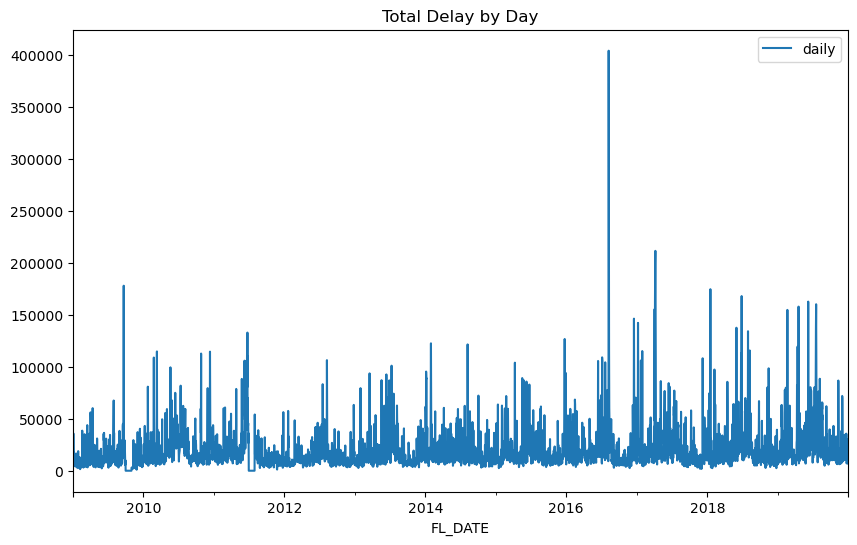

In [113]:
plt.figure(figsize=(10,6))

flights.resample('D').sum().total_delays.plot(label='daily')
# flights.resample('W').sum().total_delays.plot(label='weekly')
# flights.resample('M').sum().total_delays.plot(label='monthly')
# flights.resample('D').sum().total_delays.plot(label='yearly')


plt.title('Total Delay by Day')
plt.legend()
plt.show()

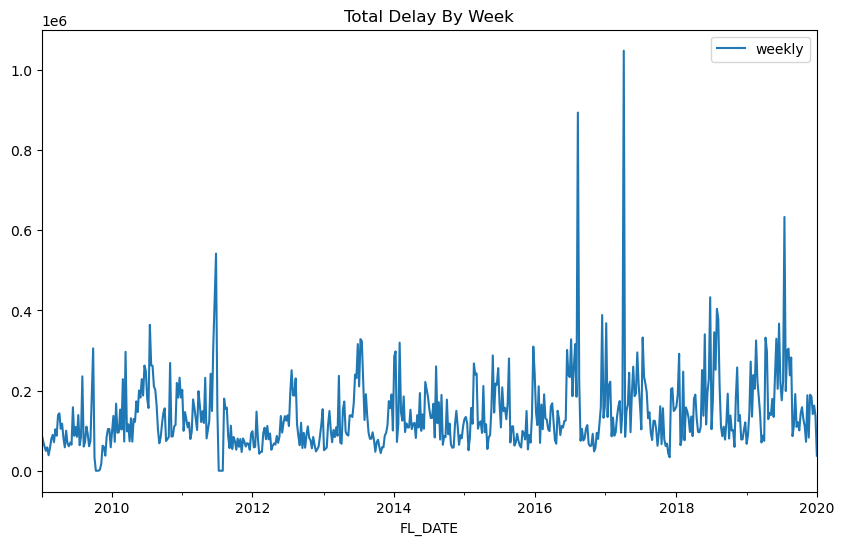

In [114]:

plt.figure(figsize=(10,6))

# flights.resample('D').sum().total_delays.plot(label='daily')
flights.resample('W').sum().total_delays.plot(label='weekly')
# flights.resample('M').sum().total_delays.plot(label='monthly')
# flights.resample('D').sum().total_delays.plot(label='yearly')


plt.title('Total Delay By Week')
plt.legend()
plt.show()


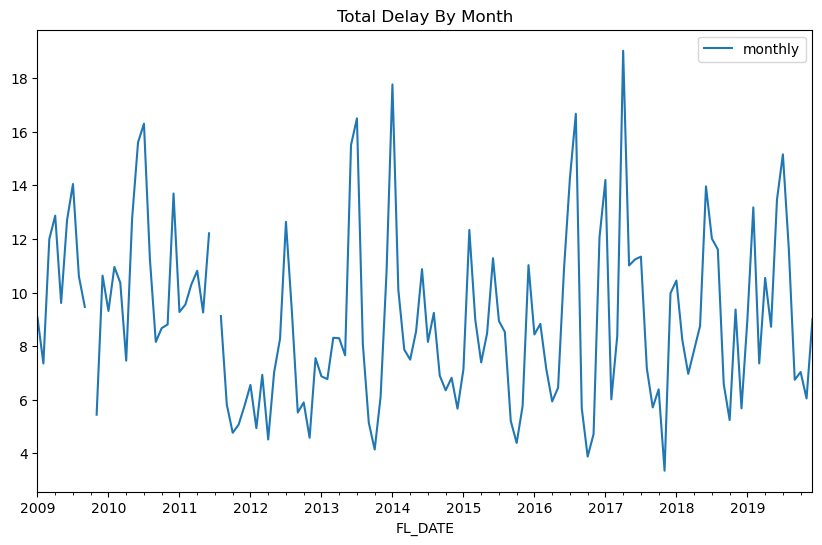

In [115]:

plt.figure(figsize=(10,6))

# flights.resample('D').sum().total_delays.plot(label='daily')
# flights.resample('W').sum().total_delays.plot(label='weekly')
flights.resample('M').mean().total_delays.plot(label='monthly')
# flights.resample('D').sum().total_delays.plot(label='yearly')


plt.title('Total Delay By Month')
plt.legend()
plt.show()

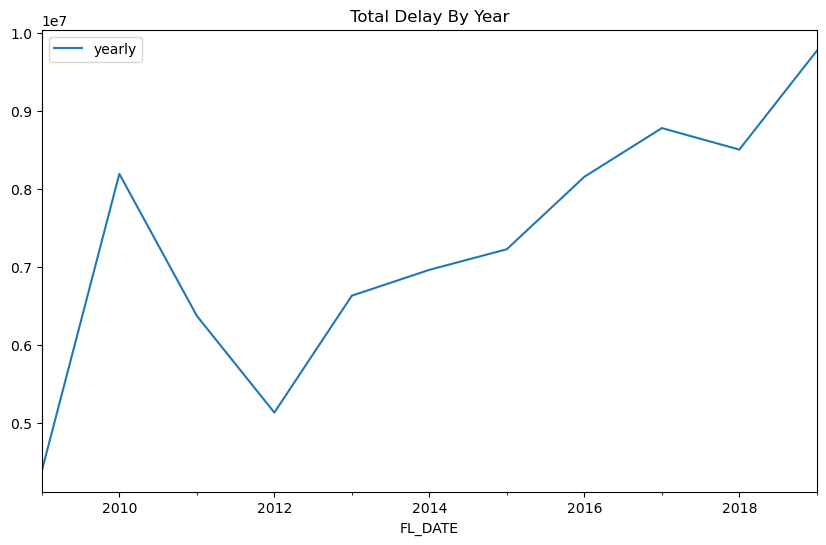

In [116]:

plt.figure(figsize=(10,6))

# flights.resample('D').sum().total_delays.plot(label='daily')
# flights.resample('W').sum().total_delays.plot(label='weekly')
# flights.resample('M').sum().total_delays.plot(label='monthly')
flights.resample('Y').sum().total_delays.plot(label='yearly')


plt.title('Total Delay By Year')
plt.legend()
plt.show()